In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/BaselineED_bench.csv")
gen =pd.read_csv("../data/GenED_bench.csv")

paper_cols = ['log', 'fitness_heu', 'precision_heu',
           'fscore_heu', 'size_heu', 'cfc_heu', 'fitness_ilp', 'precision_ilp', 'fscore_ilp',
           'size_ilp','cfc_ilp', 'fitness_imf', 'precision_imf', 'fscore_imf', 'size_imf', 'cfc_imf']

df= df[paper_cols]

print(gen.shape, df.shape)
#print(gen.columns == df.columns)

(441, 19) (20, 16)


In [3]:
df['source']='Real'
gen['source']='Generated'
both_df = pd.concat([df, gen])
print(both_df.shape)
both_df.head()

(461, 20)


,log,fitness_heu,precision_heu,fscore_heu,size_heu,cfc_heu,fitness_ilp,precision_ilp,fscore_ilp,size_ilp,cfc_ilp,fitness_imf,precision_imf,fscore_imf,size_imf,cfc_imf,source,pnsize_heu,pnsize_imf,pnsize_ilp
0,BPIC12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999782,0.106250,0.192086,69.0,37.0,Real,NaN,NaN,NaN
1,BPIC13cp,0.989977,0.868430,0.925229,14.0,8.0,0.999955,0.792380,0.884148,20.0,6.0,0.990413,0.947021,0.968231,15.0,9.0,Real,NaN,NaN,NaN
2,BPIC13inc,0.991281,0.885081,0.935176,14.0,8.0,0.999977,0.625731,0.769777,19.0,5.0,0.957241,0.716391,0.819486,16.0,8.0,Real,NaN,NaN,NaN
3,BPIC13op,0.990133,0.962056,0.975893,12.0,7.0,0.999930,0.906565,0.950961,10.0,3.0,0.851320,0.906565,0.878074,17.0,8.0,Real,NaN,NaN,NaN
4,BPIC14dc_p,0.927321,1.000000,0.962290,547.0,364.0,NaN,NaN,NaN,NaN,NaN,0.999833,1.000000,0.999916,606.0,364.0,Real,NaN,NaN,NaN


In [4]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(both_df.drop(['log','source'], axis=1))
imp_df = imp_mean.transform(both_df.drop(['log','source'], axis=1))
imp_df = pd.DataFrame(imp_df, columns = both_df.columns[2:])
print("Before:", len(both_df.loc[:, both_df.isna().any()].columns), "columns in", len(both_df.loc[:, both_df.isna().any()]), 'rows')
print("After:", len(imp_df.loc[:, imp_df.isna().any()].columns))

Before: 18 columns in 461 rows
After: 0


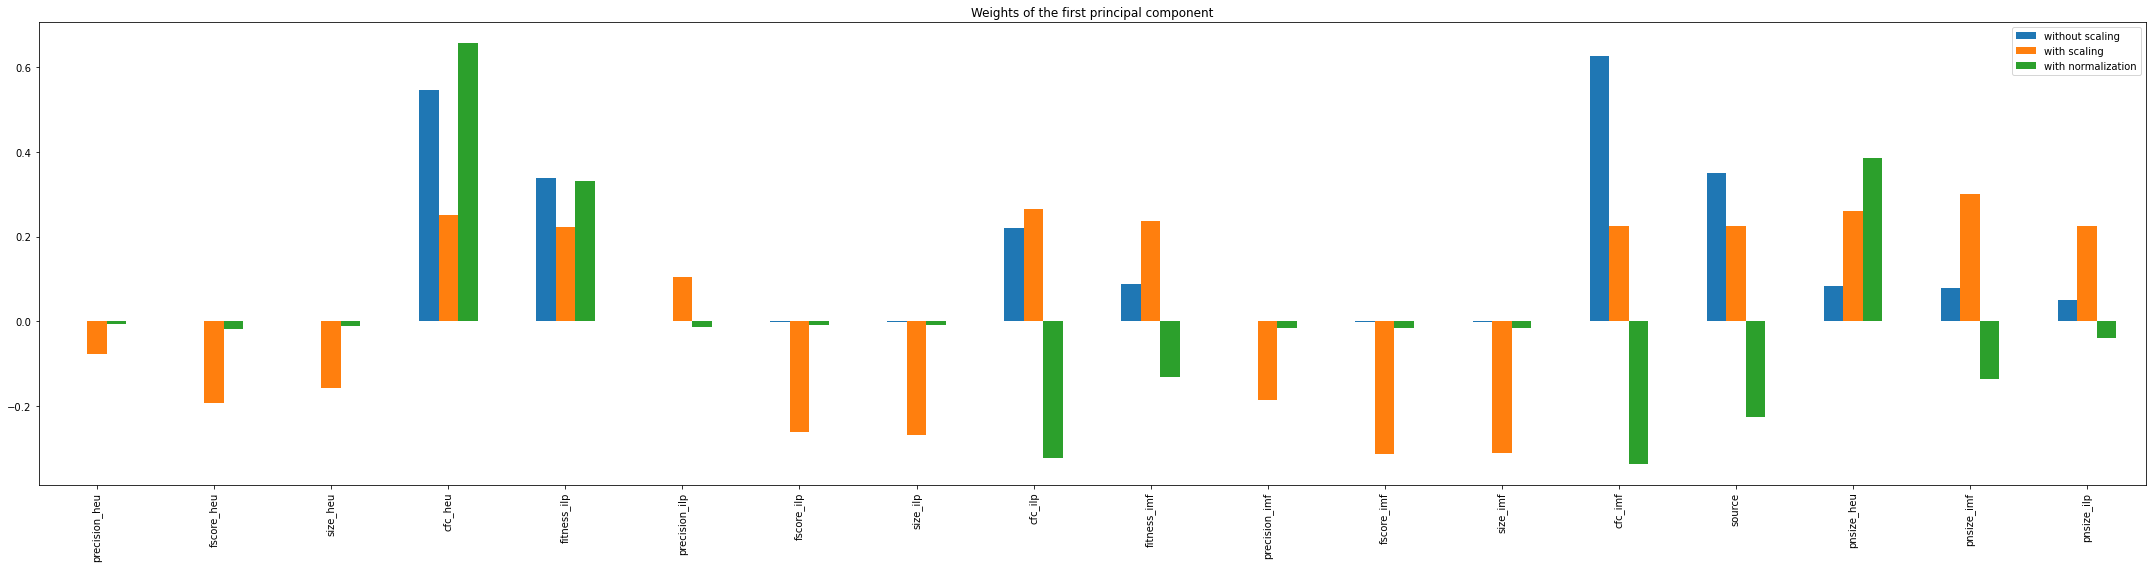

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

X = imp_df
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X)
normed_X = Normalizer(norm="l2").fit_transform(X)


import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
norm_pca = PCA(n_components=2).fit(normed_X)


X_train_transformed = pca.transform(X)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)
X_train_norm_transformed = norm_pca.transform(normed_X)


first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component["with normalization"] = norm_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(30, 8)
)

_ = plt.tight_layout()

In [6]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from gedi.plotter import FeaturesPlotter

SUCCESS: Saved , plot_type='boxplot' plot in ../output/plots/boxplots_GenED_bench_3fts_441gEL_of403.jpg
SUCCESS: Saved , plot_type='boxplot' plot in ../output/plots/boxplots_GenED_bench_3fts_441gEL_of341.jpg
SUCCESS: Saved , plot_type='boxplot' plot in ../output/plots/boxplots_GenED_bench_3fts_441gEL_of422.jpg


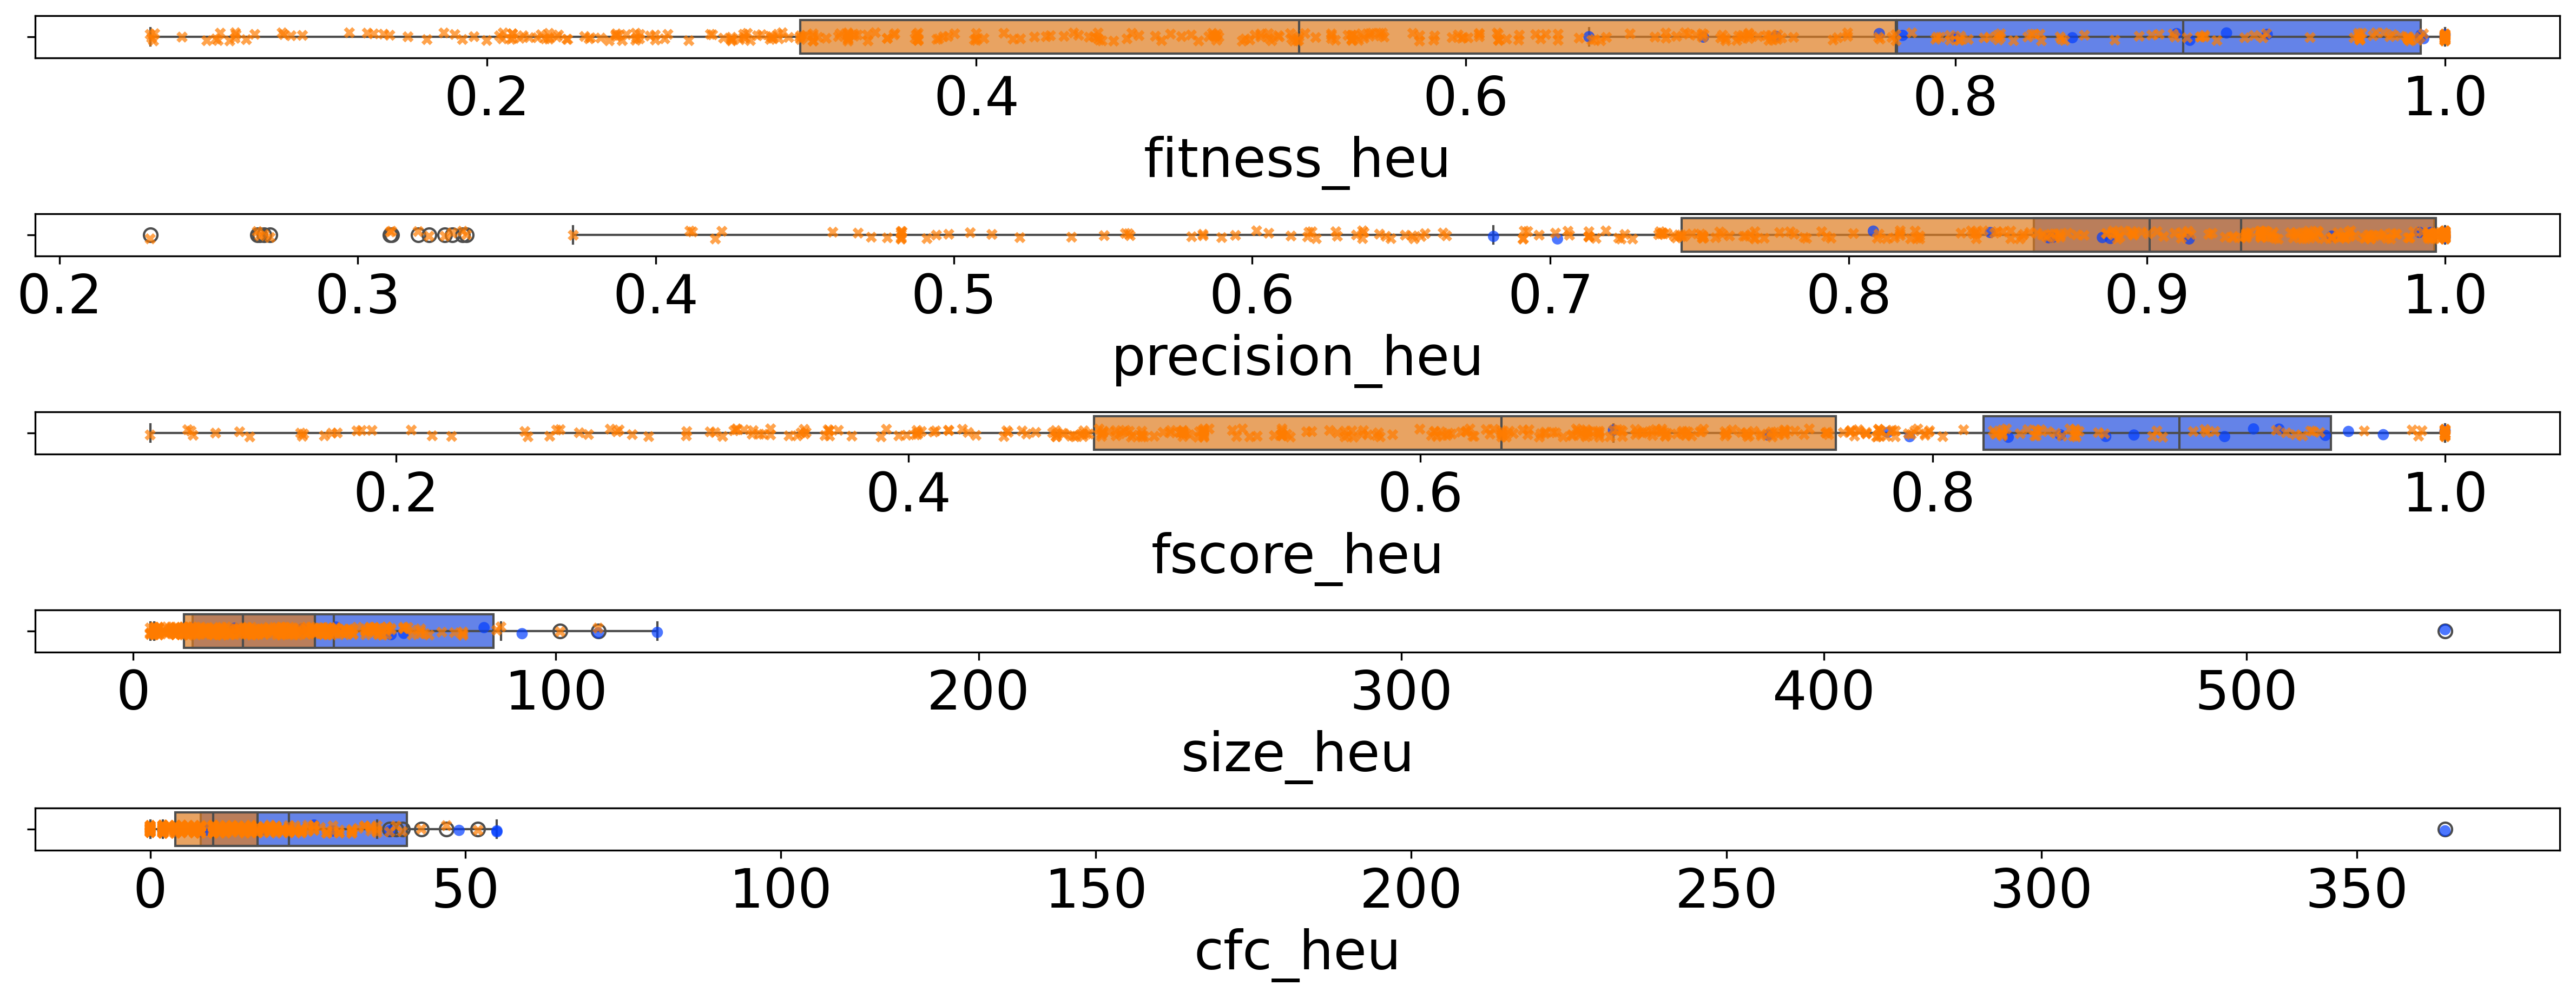

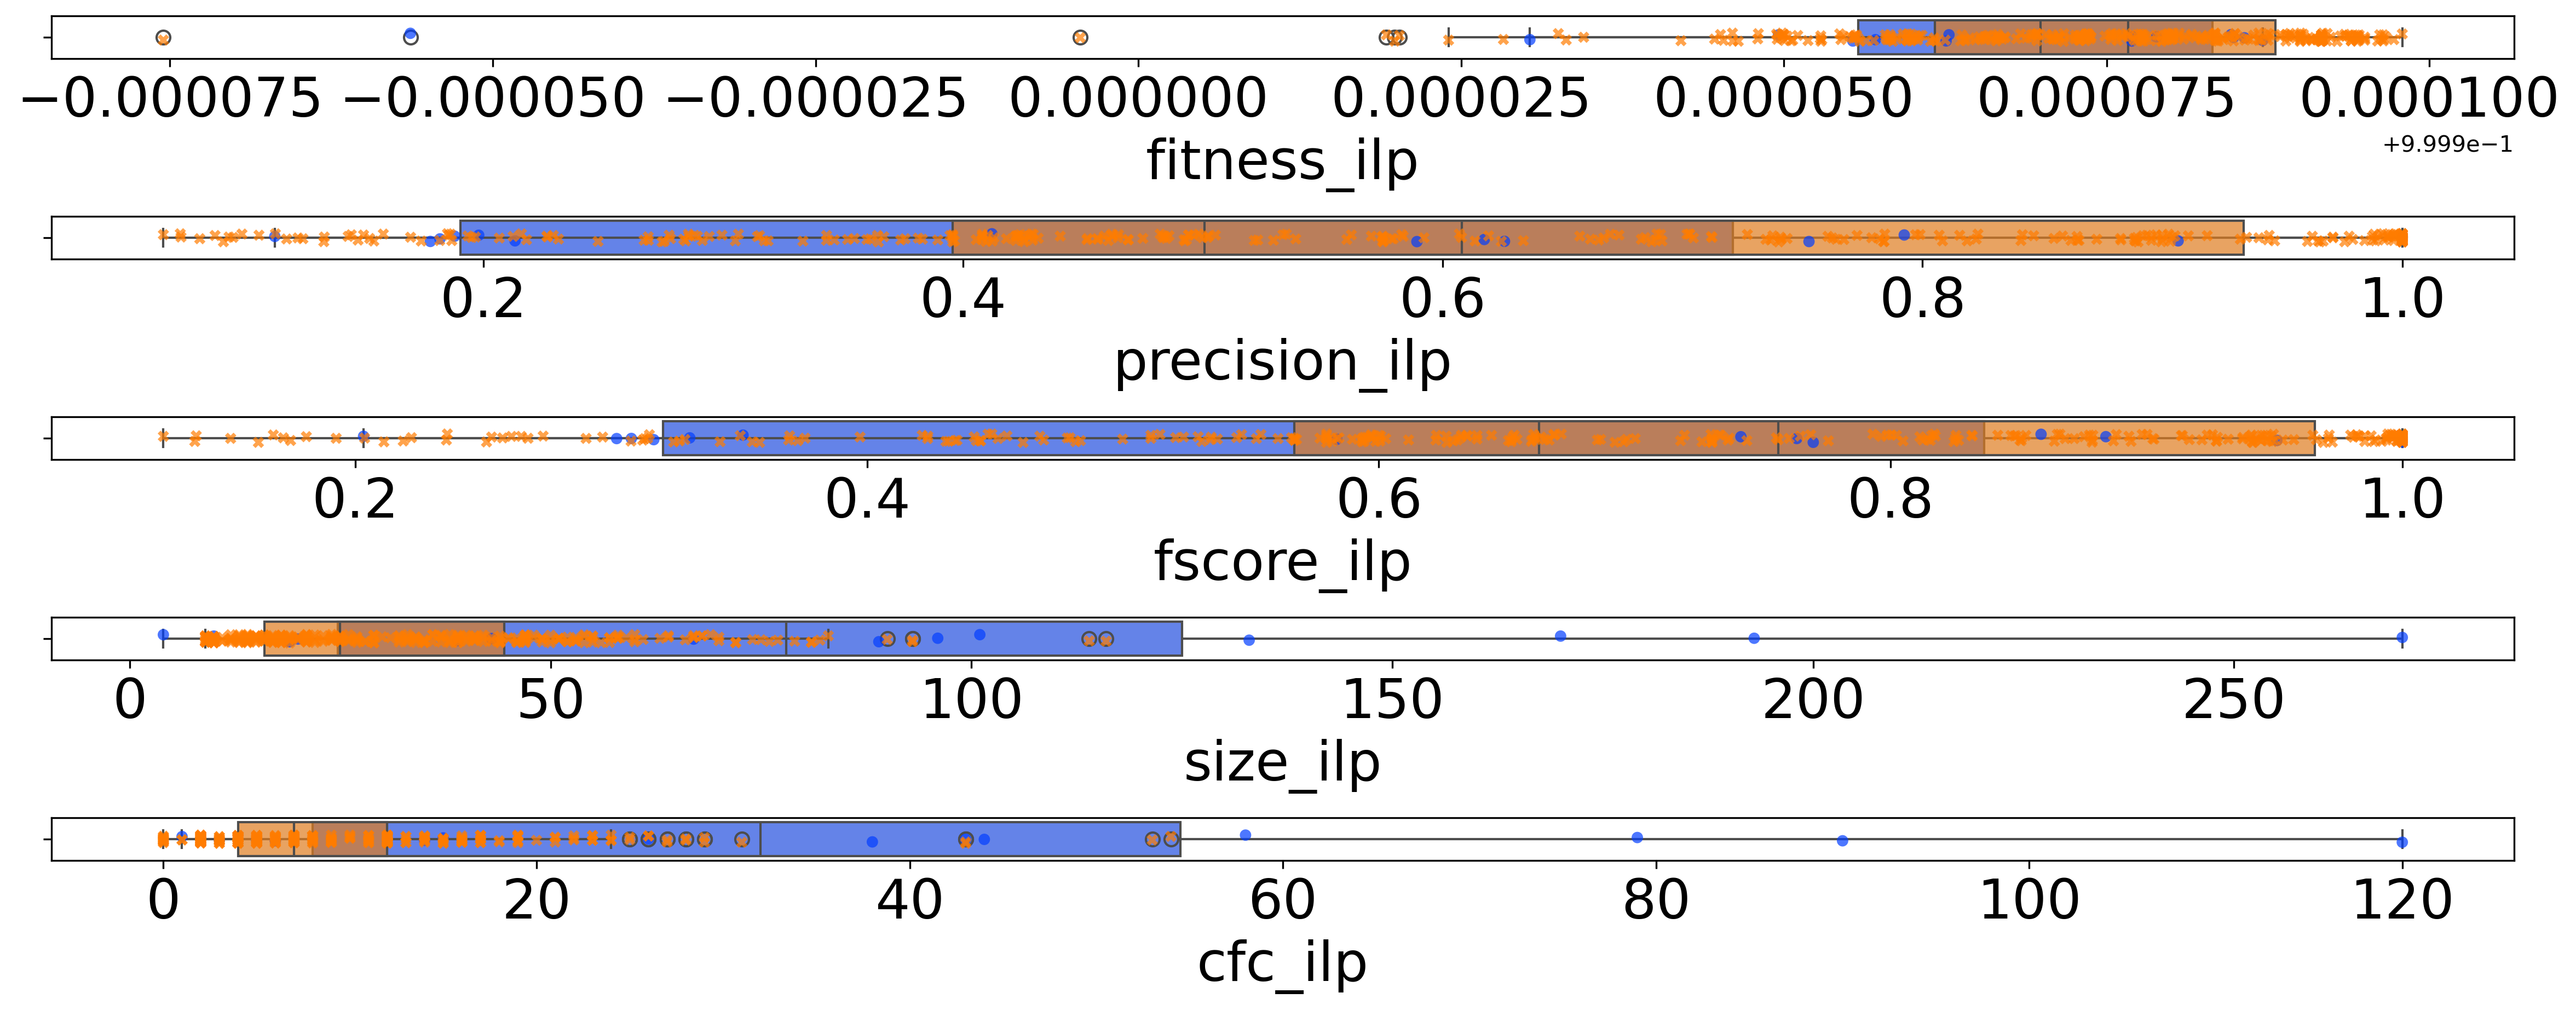

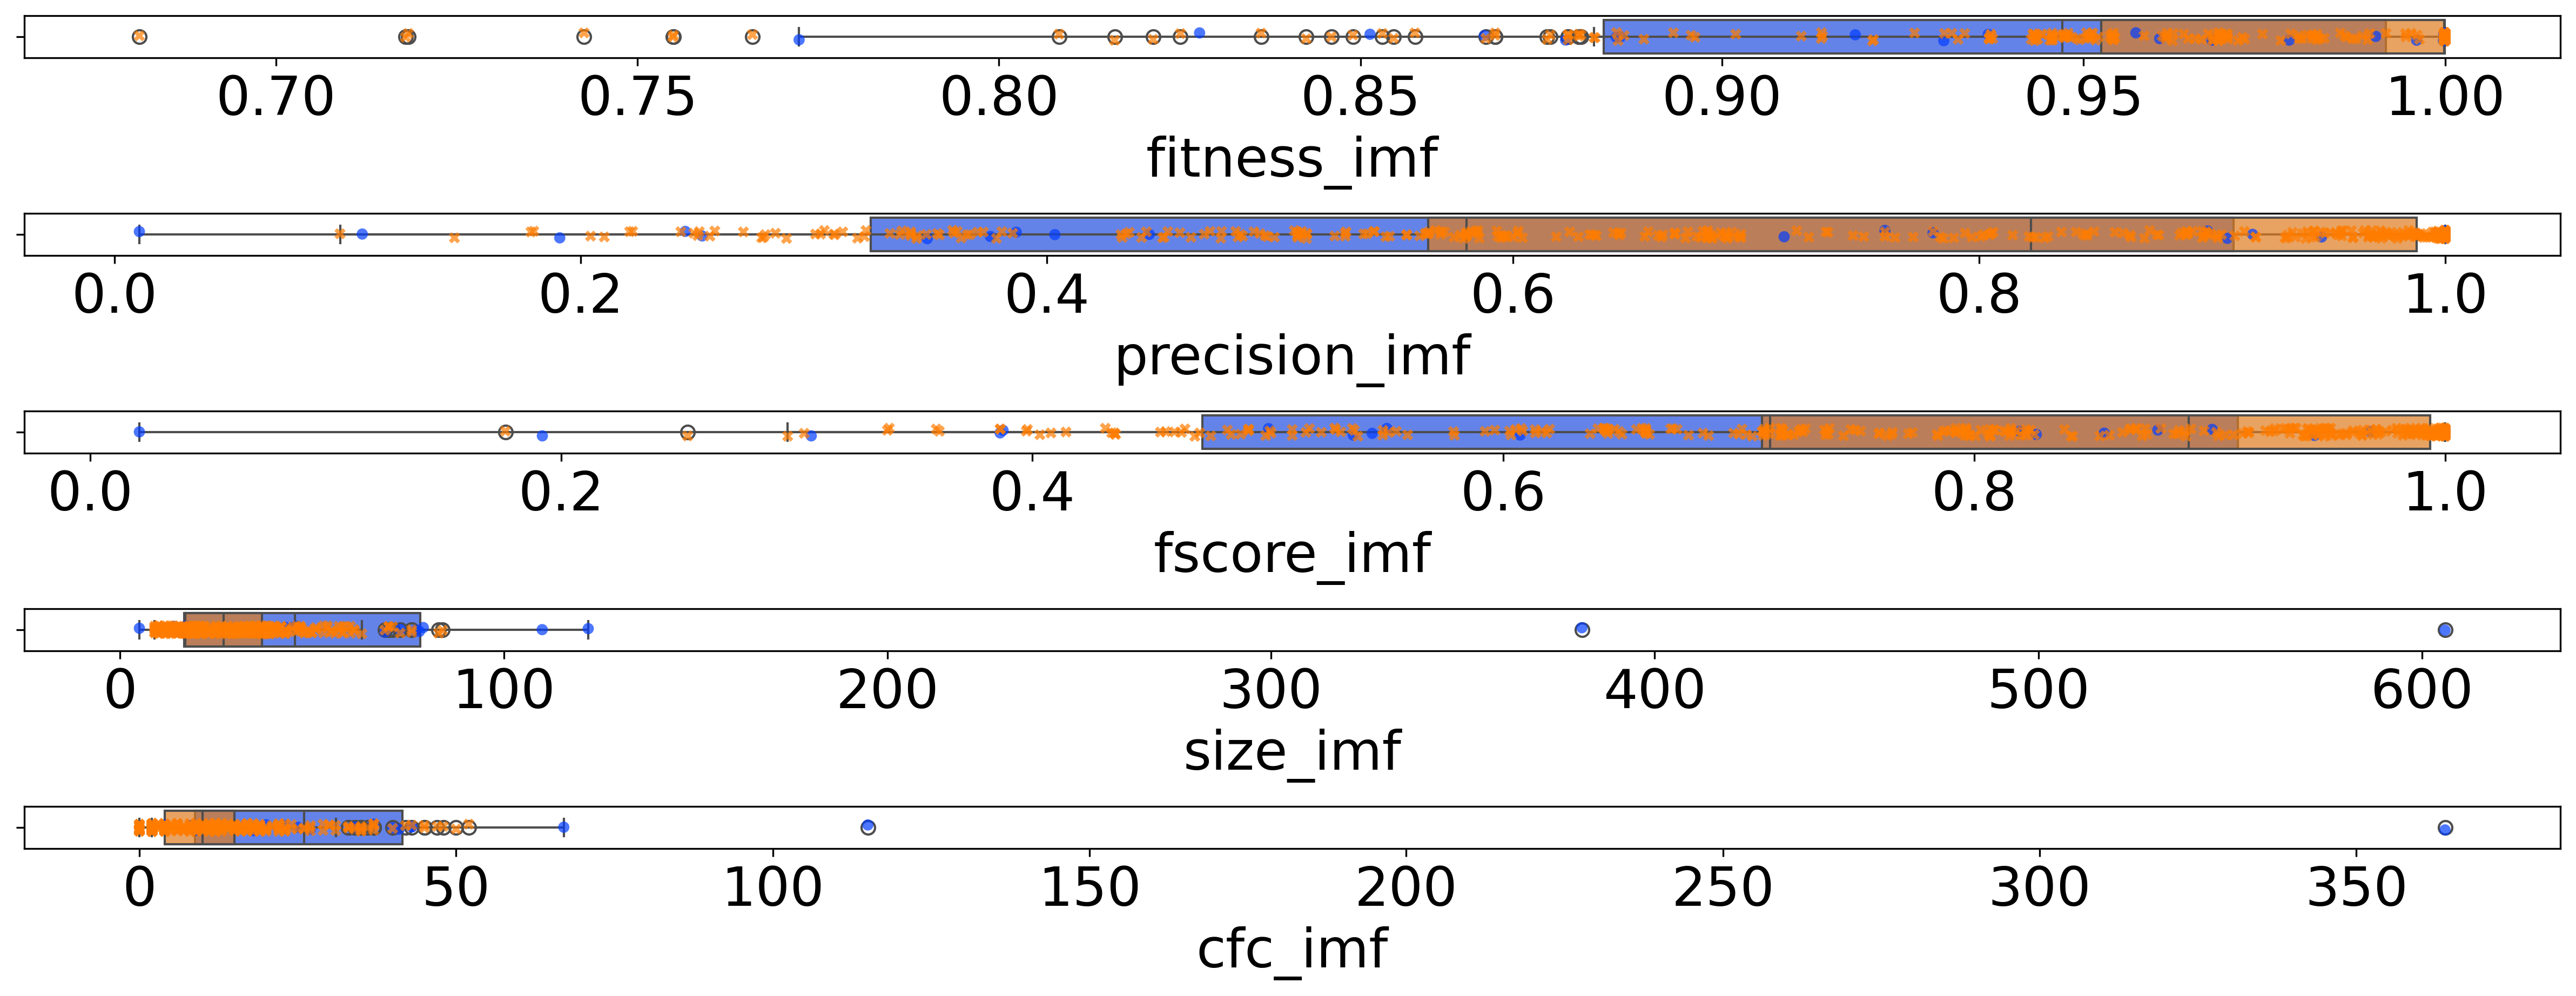

In [7]:
model_params = {"output_path":"../output/plots", "input_path":"../data/GenED_bench.csv",
                "real_eventlog_path": "../data/BaselineED_bench.csv",
                "plot_type":"boxplot", "font_size":24, "boxplot_w":10}
generated = gen.drop(['source'], axis=1)

miners = ['heu', 'ilp', 'imf']
for miner in miners:
    metrics = ['fitness', 'precision', 'fscore', 'size', 'cfc']
    metrics = [(x+'_'+miner) for x in metrics]
    generated_heu = generated[metrics]
    FeaturesPlotter( generated_heu, model_params)